# Code Clause Data Science Intern 

# Name : Ashwanth Narlapally

# Task 2  : Gold Price Prediction

# Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Import Data

In [42]:
df = pd.read_csv("gld_price_data.csv")
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [43]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


# Exploratory Data Analysis [EDA]

In [44]:
df.shape

(2290, 6)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [46]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Correlation

In [47]:
correlation = df.corr()
correlation

C:\Users\Ashwanth Narlapally\AppData\Local\Temp\ipykernel_6064\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


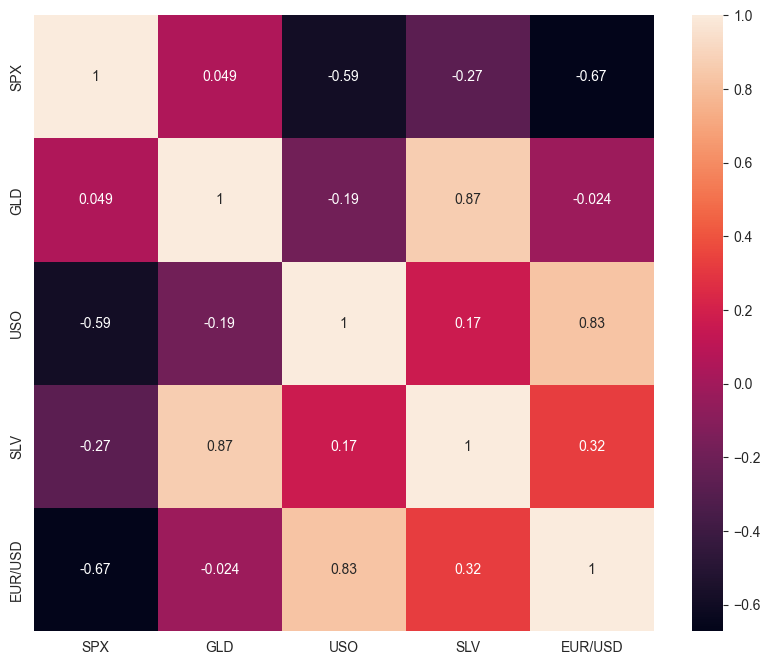

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)
plt.show()

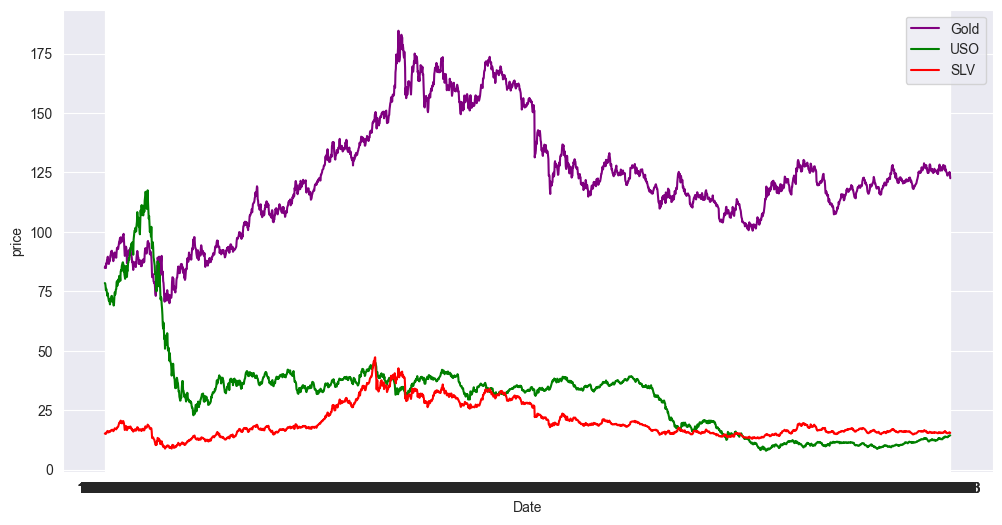

In [49]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='GLD', data=df, color='purple', label='Gold')
sns.lineplot(x='Date', y='USO', data=df, color='green', label='USO')
sns.lineplot(x='Date', y='SLV', data=df, color='red', label='SLV')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()


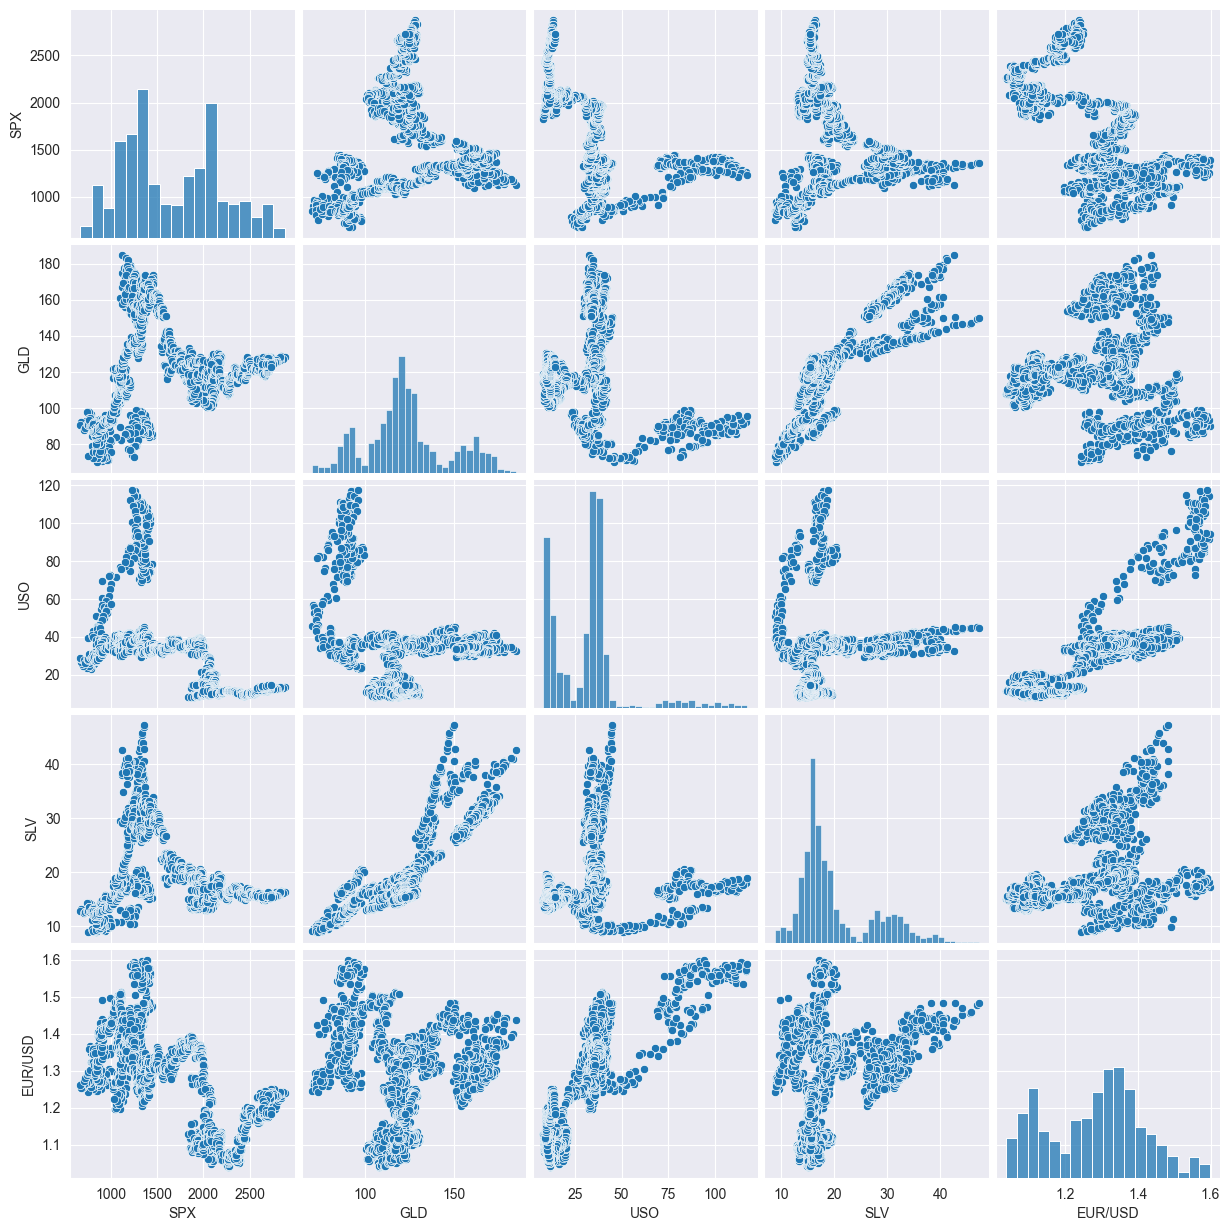

In [50]:
sns.pairplot(df)
plt.show()

C:\Users\Ashwanth Narlapally\AppData\Local\Temp\ipykernel_6064\2544004133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='blue')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

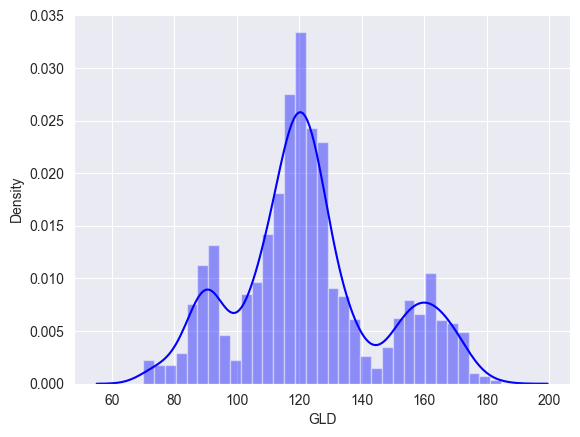

In [51]:
sns.distplot(df['GLD'],color='blue')

# Spliting Data Into Dependent & Independent

In [52]:
X = df[['SPX','USO','SLV','EUR/USD']]
x = X.iloc[:,:].values
x

array([[1.44716003e+03, 7.84700010e+01, 1.51800000e+01, 1.47169200e+00],
       [1.44716003e+03, 7.83700030e+01, 1.52850000e+01, 1.47449100e+00],
       [1.41163000e+03, 7.73099980e+01, 1.51670000e+01, 1.47549200e+00],
       ...,
       [2.72307007e+03, 1.44100000e+01, 1.57400000e+01, 1.19175300e+00],
       [2.73012988e+03, 1.43800000e+01, 1.55600000e+01, 1.19311800e+00],
       [2.72578003e+03, 1.44058000e+01, 1.54542000e+01, 1.18203300e+00]])

In [53]:
y = df.iloc[:,2].values 
y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

# Spliting into Training & Testing Data

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [55]:
x_train.shape,x_test.shape

((1832, 4), (458, 4))

In [56]:
y_train.shape,y_train.shape

((1832,), (1832,))

# Linear Regression Model

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(x_test)
y_pred

array([121.893539  , 142.52364868, 158.91453793, 114.2187805 ,
       110.36659025, 104.50331873, 109.98245681,  92.18483425,
       120.90649253, 123.318912  , 191.2074328 , 118.60055338,
       112.11950573,  93.46765189, 102.30779779,  97.98184003,
       118.85518215,  94.0029039 , 119.86781484, 116.59909644,
       122.21215189, 142.45378454, 121.22332281, 120.62860463,
       163.30049944, 104.70315921, 125.56912816,  87.10875178,
        95.73671386,  86.93309315, 121.81073623, 147.1233332 ,
       144.33048658, 121.95542705, 121.2464489 ,  94.5371824 ,
       152.31281012, 113.94185408, 110.92710898, 182.21152503,
        97.46373243, 128.50200625, 120.48416906, 140.20343573,
       120.16866258,  90.96452083,  82.43780029, 123.52782293,
       144.52004651, 113.76951398, 123.14800018, 159.28339044,
       141.34969761,  88.97598628, 163.39595336, 142.38892627,
       109.31495867, 119.81421995,  93.1108709 , 129.67869305,
       119.96744889, 142.21550112, 115.80809495, 115.07

In [60]:
accuracy_L = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for lr :', accuracy_L)

R-Squared Error for lr : 0.8696713120900417


# Random Forest Model

In [61]:
rf = RandomForestRegressor(n_estimators=100)

In [62]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
y_pred = rf.predict(x_test)
y_pred

array([113.39239989, 148.05950069, 140.69729852, 112.45880168,
       113.74449977,  95.59209946, 111.81019987,  93.26629934,
       121.00290097, 127.14099944, 147.81969948, 120.44259934,
       119.11690052,  88.18020066,  96.17339998,  92.70349857,
       116.54250065,  89.32309918, 125.37180098, 114.75880013,
       118.84229952, 152.7756019 , 122.61849795, 119.96189962,
       171.41009985, 108.38359837, 120.18240032,  87.22889847,
        88.05970073,  88.6713993 , 121.31060034, 154.1440014 ,
       151.11589827, 126.09570055, 126.57610022,  90.63529913,
       157.84149968, 121.49090163, 106.62280052, 144.25779654,
        92.67079967, 127.71910079, 117.55740118, 152.54500185,
       119.3435997 ,  91.31570173,  79.78059995, 120.28020179,
       132.10810027, 119.00879892, 127.13040108, 165.91600065,
       153.24630057,  92.72759946, 149.07110049, 152.51529898,
       113.14350088, 112.2839003 ,  87.1254991 , 127.76109889,
       124.99980041, 151.93010226, 114.57309981, 110.70

In [64]:
accuracy_R = metrics.r2_score(y_test, y_pred)
print('R-Squared Error for rf :', accuracy_R)

R-Squared Error for rf : 0.9880759788837219


In [65]:
data=[["Logistic Regression",accuracy_L],
     ['Random Forest',accuracy_R]]
model= pd.DataFrame(data,columns=["Name","Accuracy Score"])
model

,Name,Accuracy Score
0,Logistic Regression,0.869671
1,Random Forest,0.988076
